In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Считываем файл с казанскими станциями метро

In [2]:
metro_data = pd.read_csv("kazan_metro.csv")
metro_data.head()

,Tаблица 1,Unnamed: 1
0,Start,End
1,Авиастроительная,Северный вокзал
2,Северный вокзал,Яшьлек
3,Яшьлек,Козья слобода
4,Козья слобода,Кремлёвская


Приводим файл к правильному виду

In [3]:
first_vector = metro_data.columns
metro_data.loc[-1] = first_vector.astype(str)  # adding a row
metro_data.index = metro_data.index + 1  # shifting index
metro_data = metro_data.sort_index()
metro_data.columns = ['Start', 'End']

metro_data.head(10)

,Start,End
0,Tаблица 1,Unnamed: 1
1,Start,End
2,Авиастроительная,Северный вокзал
3,Северный вокзал,Яшьлек
4,Яшьлек,Козья слобода
5,Козья слобода,Кремлёвская
6,Кремлёвская,Площадь Габдуллы Тукая
7,Площадь Габдуллы Тукая,Суконная слобода
8,Суконная слобода,Аметьево
9,Аметьево,Горки


Отбрасываем 2 первые строки, т.к. они не являются станциями метро

In [4]:
metro_data.drop(metro_data.head(2).index, inplace=True)

In [5]:
metro_data.head(10)

,Start,End
2,Авиастроительная,Северный вокзал
3,Северный вокзал,Яшьлек
4,Яшьлек,Козья слобода
5,Козья слобода,Кремлёвская
6,Кремлёвская,Площадь Габдуллы Тукая
7,Площадь Габдуллы Тукая,Суконная слобода
8,Суконная слобода,Аметьево
9,Аметьево,Горки
10,Горки,Проспект Победы
11,Проспект Победы,Дубравная


In [6]:


len(metro_data['Start'].unique())



10

In [7]:
kazan_metro_graph = nx.from_pandas_edgelist(metro_data, source='Start', target='End')

# Указываем, что направление перегона между станциями нас не интересует.
# (как правило, можем поехать в обе стороны)
kazan_metro_graph = nx.to_undirected(kazan_metro_graph)

print(nx.info(kazan_metro_graph))

Name: 
Type: Graph
Number of nodes: 11
Number of edges: 10
Average degree:   1.8182


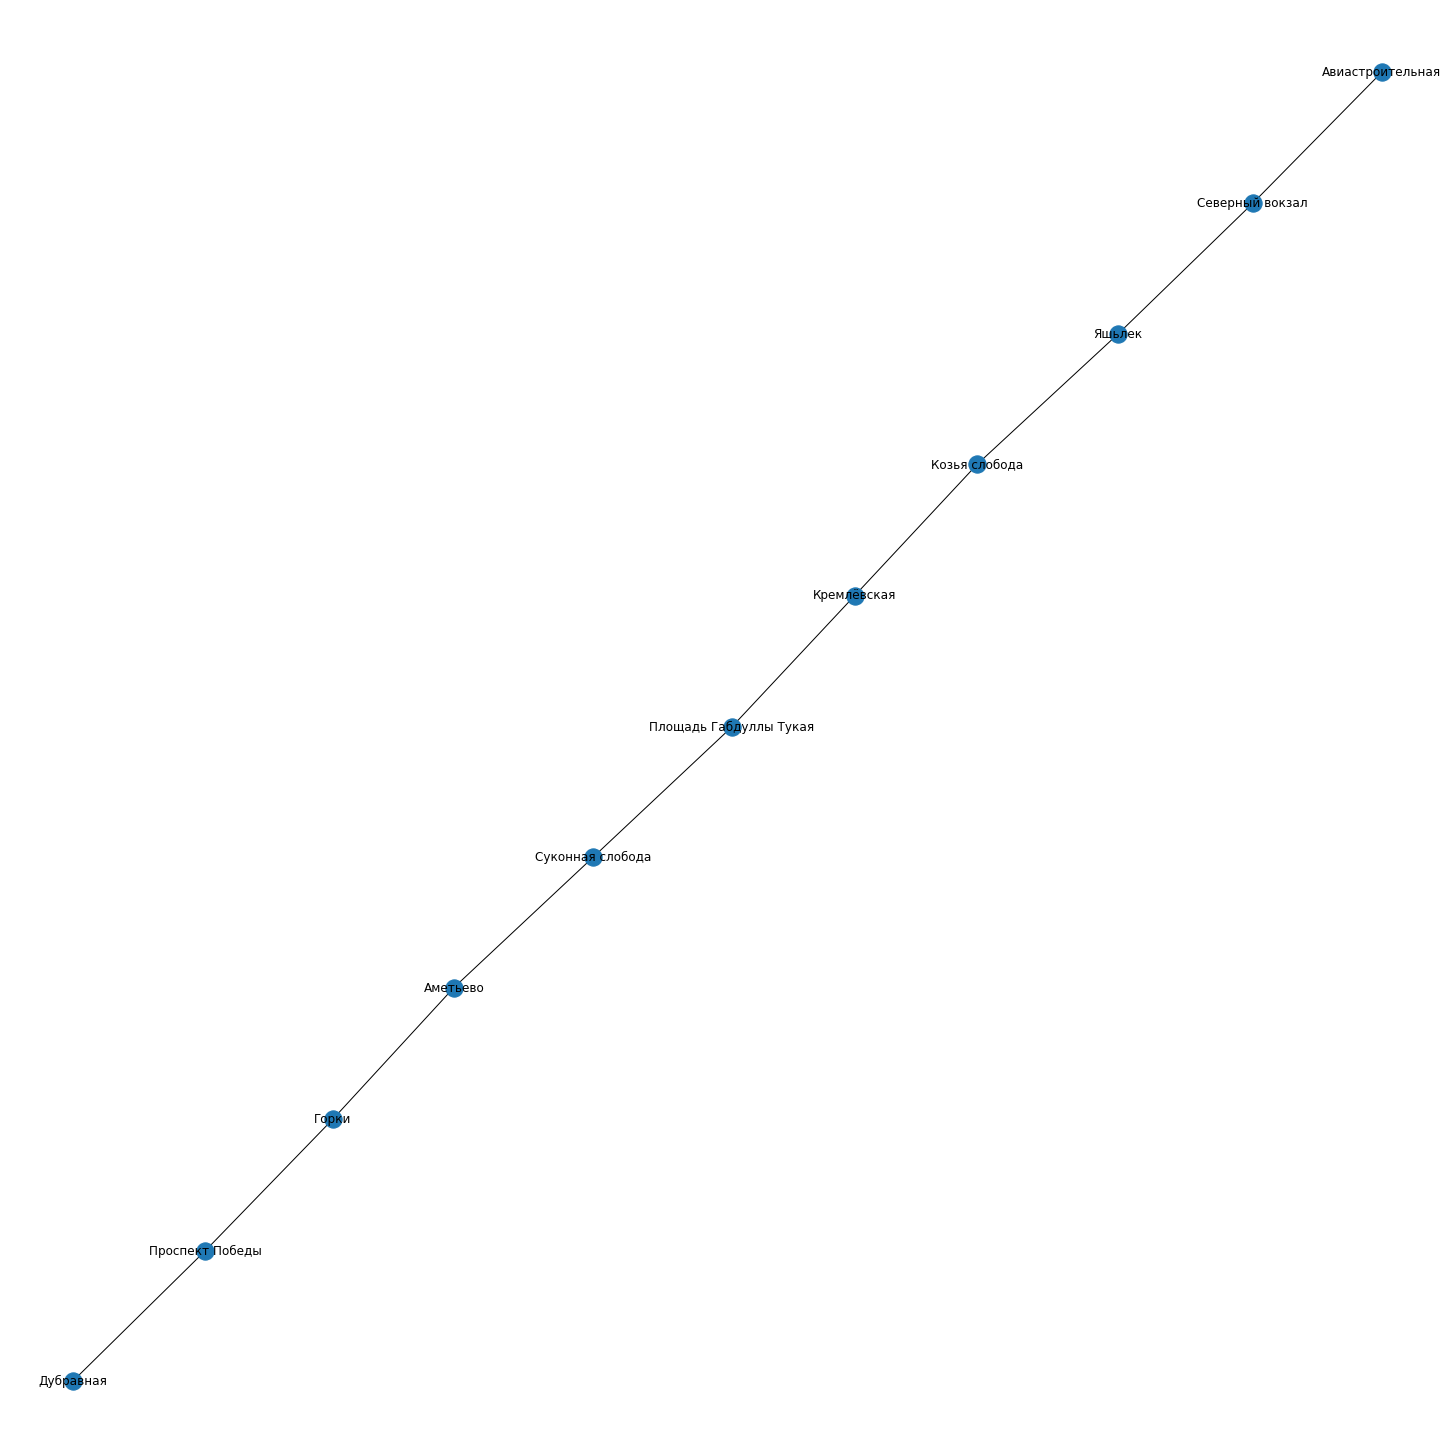

In [8]:
plt.figure(figsize=(20, 20)) 

nx.draw_kamada_kawai(kazan_metro_graph, with_labels=True)

plt.savefig('kazan_metro.png', bbox_inches='tight')

In [9]:
dict(kazan_metro_graph.degree)

{'Авиастроительная': 1,
 'Северный вокзал': 2,
 'Яшьлек': 2,
 'Козья слобода': 2,
 'Кремлёвская': 2,
 'Площадь Габдуллы Тукая': 2,
 'Суконная слобода': 2,
 'Аметьево': 2,
 'Горки': 2,
 'Проспект Победы': 2,
 'Дубравная': 1}

Text(0, 0.5, 'Кол-во станций')

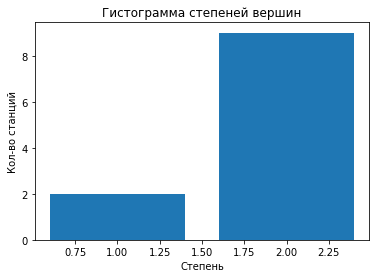

In [10]:
vals_of_degree = dict(kazan_metro_graph.degree).values()

d = dict()

for val in vals_of_degree:
    if d.get(val) is None:
        d[val] = 1
    else:
        d[val] += 1
        
plt.bar(d.keys(), d.values())
plt.title('Гистограмма степеней вершин')
plt.xlabel('Степень')
plt.ylabel('Кол-во станций')

In [11]:
nx.shortest_path(kazan_metro_graph, 'Авиастроительная', 'Проспект Победы')

['Авиастроительная',
 'Северный вокзал',
 'Яшьлек',
 'Козья слобода',
 'Кремлёвская',
 'Площадь Габдуллы Тукая',
 'Суконная слобода',
 'Аметьево',
 'Горки',
 'Проспект Победы']

In [12]:
nx.single_source_shortest_path(kazan_metro_graph, 'Проспект Победы')

{'Проспект Победы': ['Проспект Победы'],
 'Горки': ['Проспект Победы', 'Горки'],
 'Дубравная': ['Проспект Победы', 'Дубравная'],
 'Аметьево': ['Проспект Победы', 'Горки', 'Аметьево'],
 'Суконная слобода': ['Проспект Победы',
  'Горки',
  'Аметьево',
  'Суконная слобода'],
 'Площадь Габдуллы Тукая': ['Проспект Победы',
  'Горки',
  'Аметьево',
  'Суконная слобода',
  'Площадь Габдуллы Тукая'],
 'Кремлёвская': ['Проспект Победы',
  'Горки',
  'Аметьево',
  'Суконная слобода',
  'Площадь Габдуллы Тукая',
  'Кремлёвская'],
 'Козья слобода': ['Проспект Победы',
  'Горки',
  'Аметьево',
  'Суконная слобода',
  'Площадь Габдуллы Тукая',
  'Кремлёвская',
  'Козья слобода'],
 'Яшьлек': ['Проспект Победы',
  'Горки',
  'Аметьево',
  'Суконная слобода',
  'Площадь Габдуллы Тукая',
  'Кремлёвская',
  'Козья слобода',
  'Яшьлек'],
 'Северный вокзал': ['Проспект Победы',
  'Горки',
  'Аметьево',
  'Суконная слобода',
  'Площадь Габдуллы Тукая',
  'Кремлёвская',
  'Козья слобода',
  'Яшьлек',
  'Севе

In [13]:
# Функция для выделения цветом путей, пример использования ниже.
# https://github.com/jtorrents/pydata_bcn_NetworkX/blob/master/NetworkX_SNA_workshop_with_solutions.ipynb
def plot_paths(G, paths):
    plt.figure(figsize=(30, 30))
    pos = nx.fruchterman_reingold_layout(G)
    nx.draw_networkx_nodes(G, pos=pos, node_size=4000, node_color='white')
    nx.draw_networkx_labels(G, pos=pos, labels={n: n for n in G})
    # Draw edges
    nx.draw_networkx_edges(G, pos=pos)
    for path in paths:
        edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos=pos, edgelist=edges, edge_color='red', width=3)
    ax = plt.gca()
    ax.set_axis_off()
    ax.grid(None)

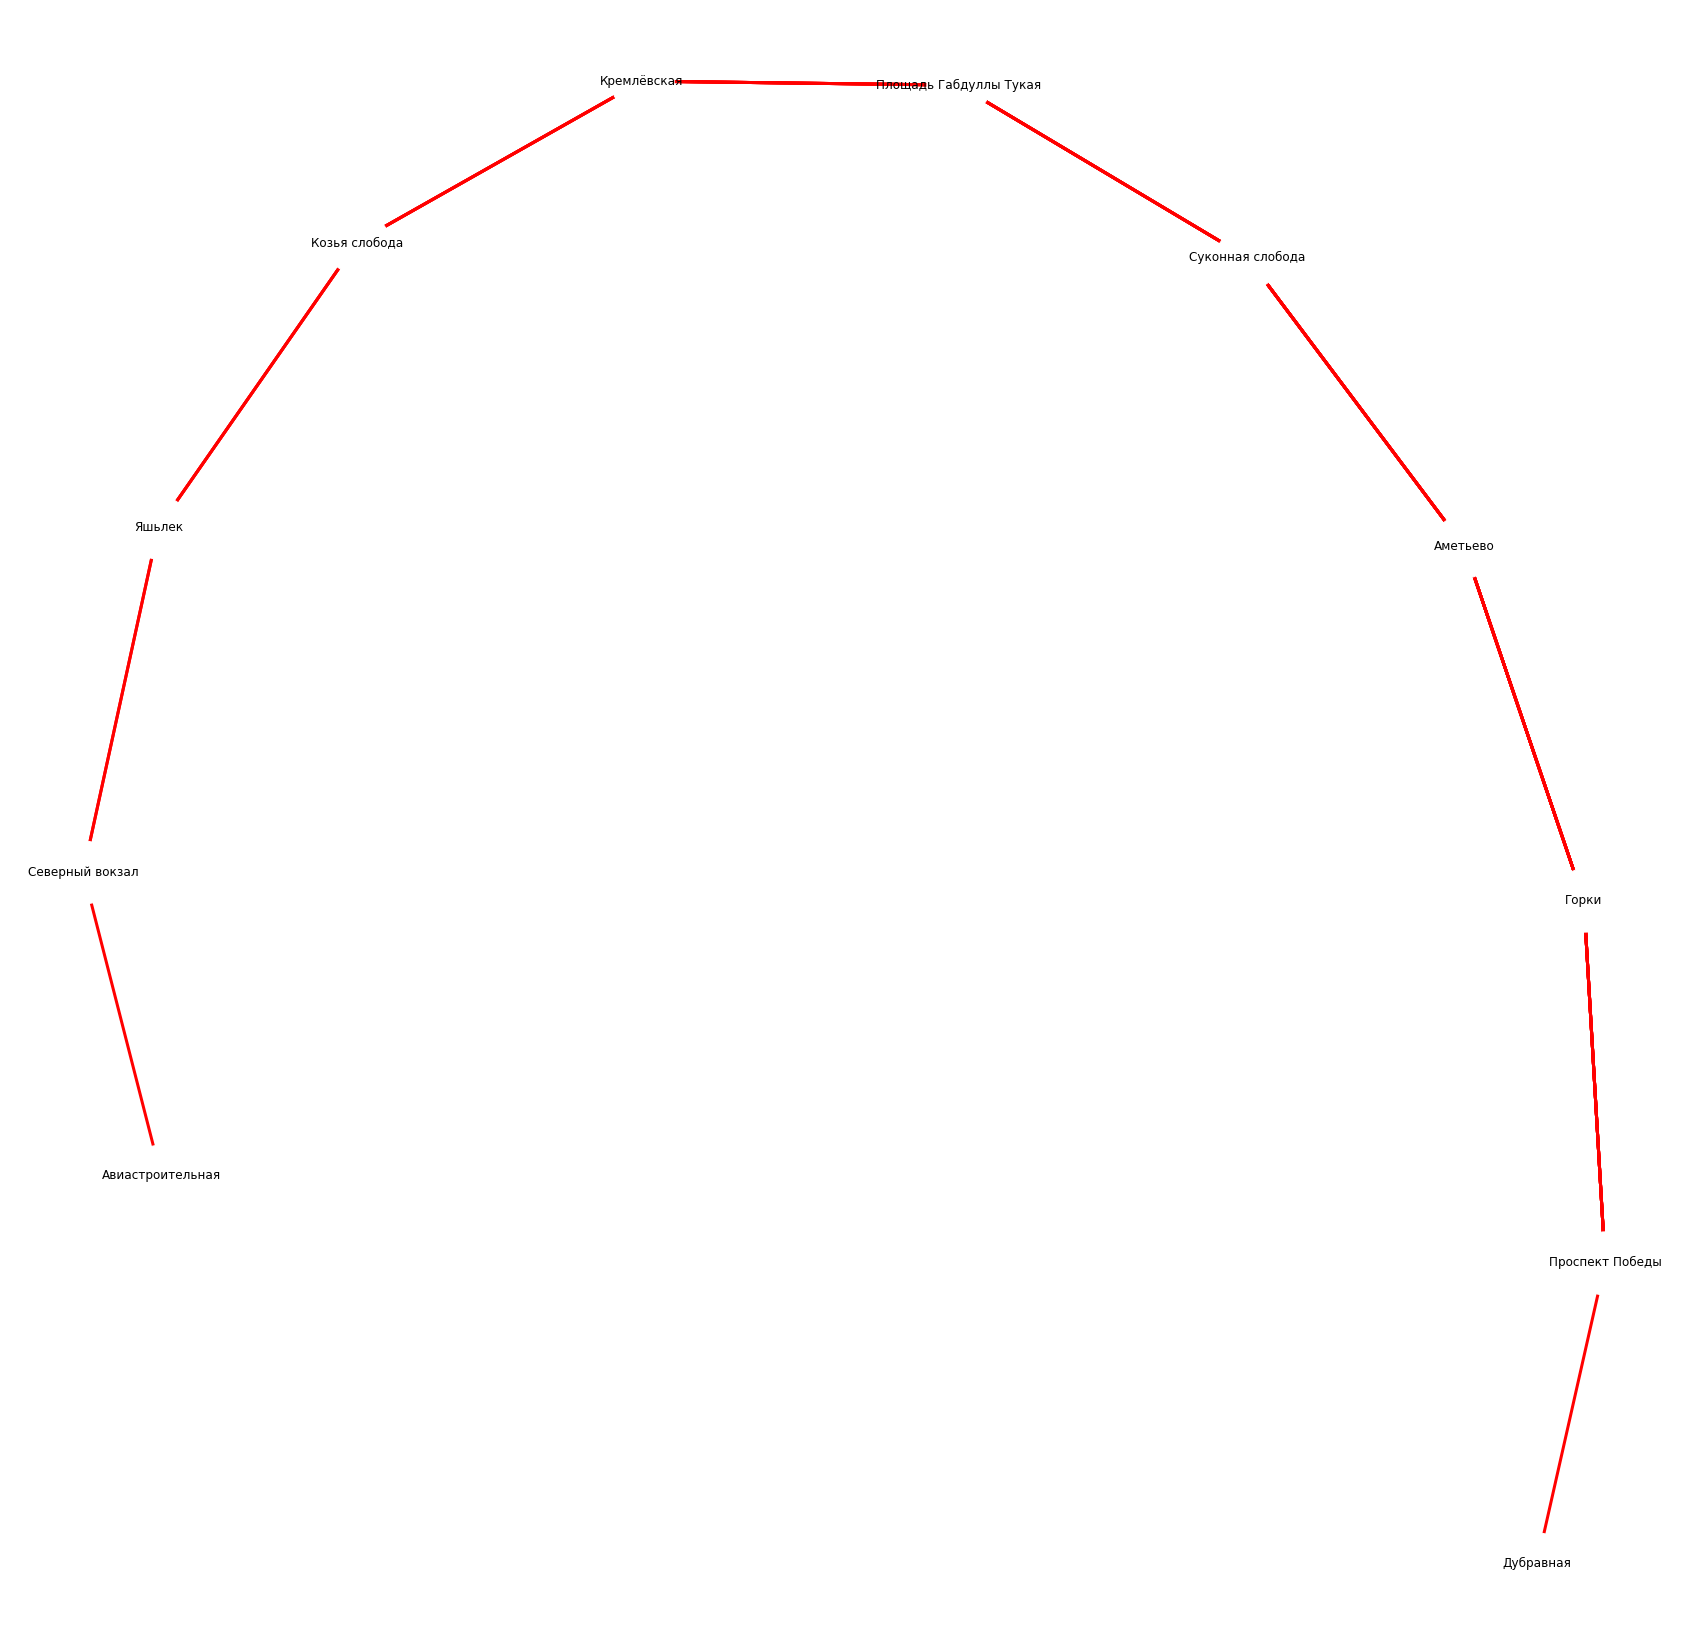

In [14]:
plot_paths(kazan_metro_graph, nx.single_source_shortest_path(kazan_metro_graph, 'Проспект Победы').values())

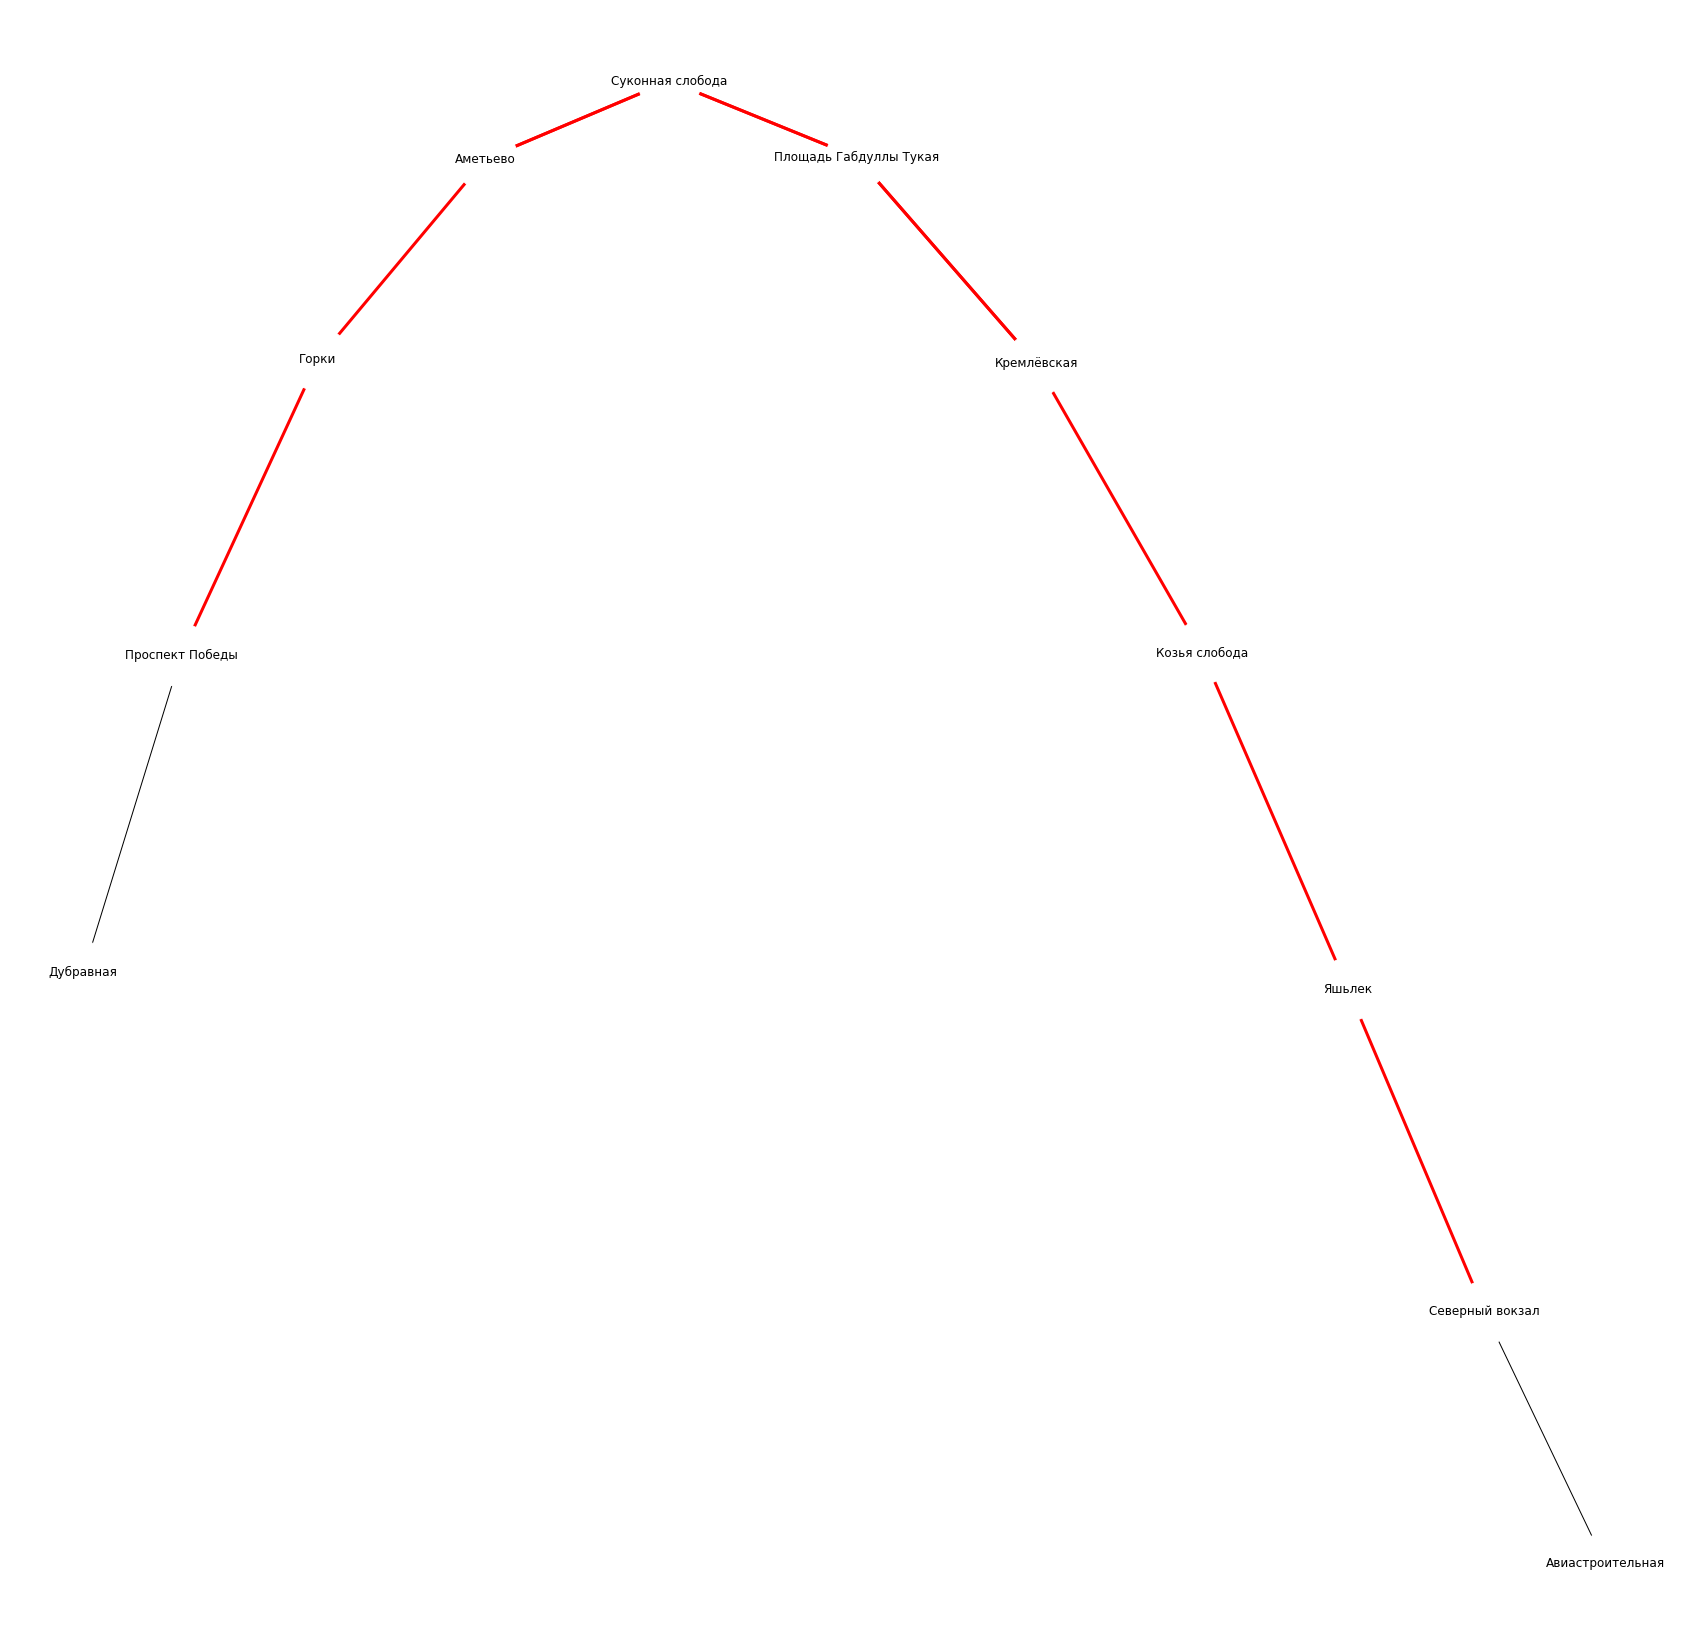

In [15]:

# Вывод нескольких кратчайших путей между конкретными парами вершин.
plot_paths(
    kazan_metro_graph,
    [
        nx.shortest_path(kazan_metro_graph, 'Кремлёвская', 'Проспект Победы'),
        nx.shortest_path(kazan_metro_graph, 'Северный вокзал', 'Аметьево')
    ]
)



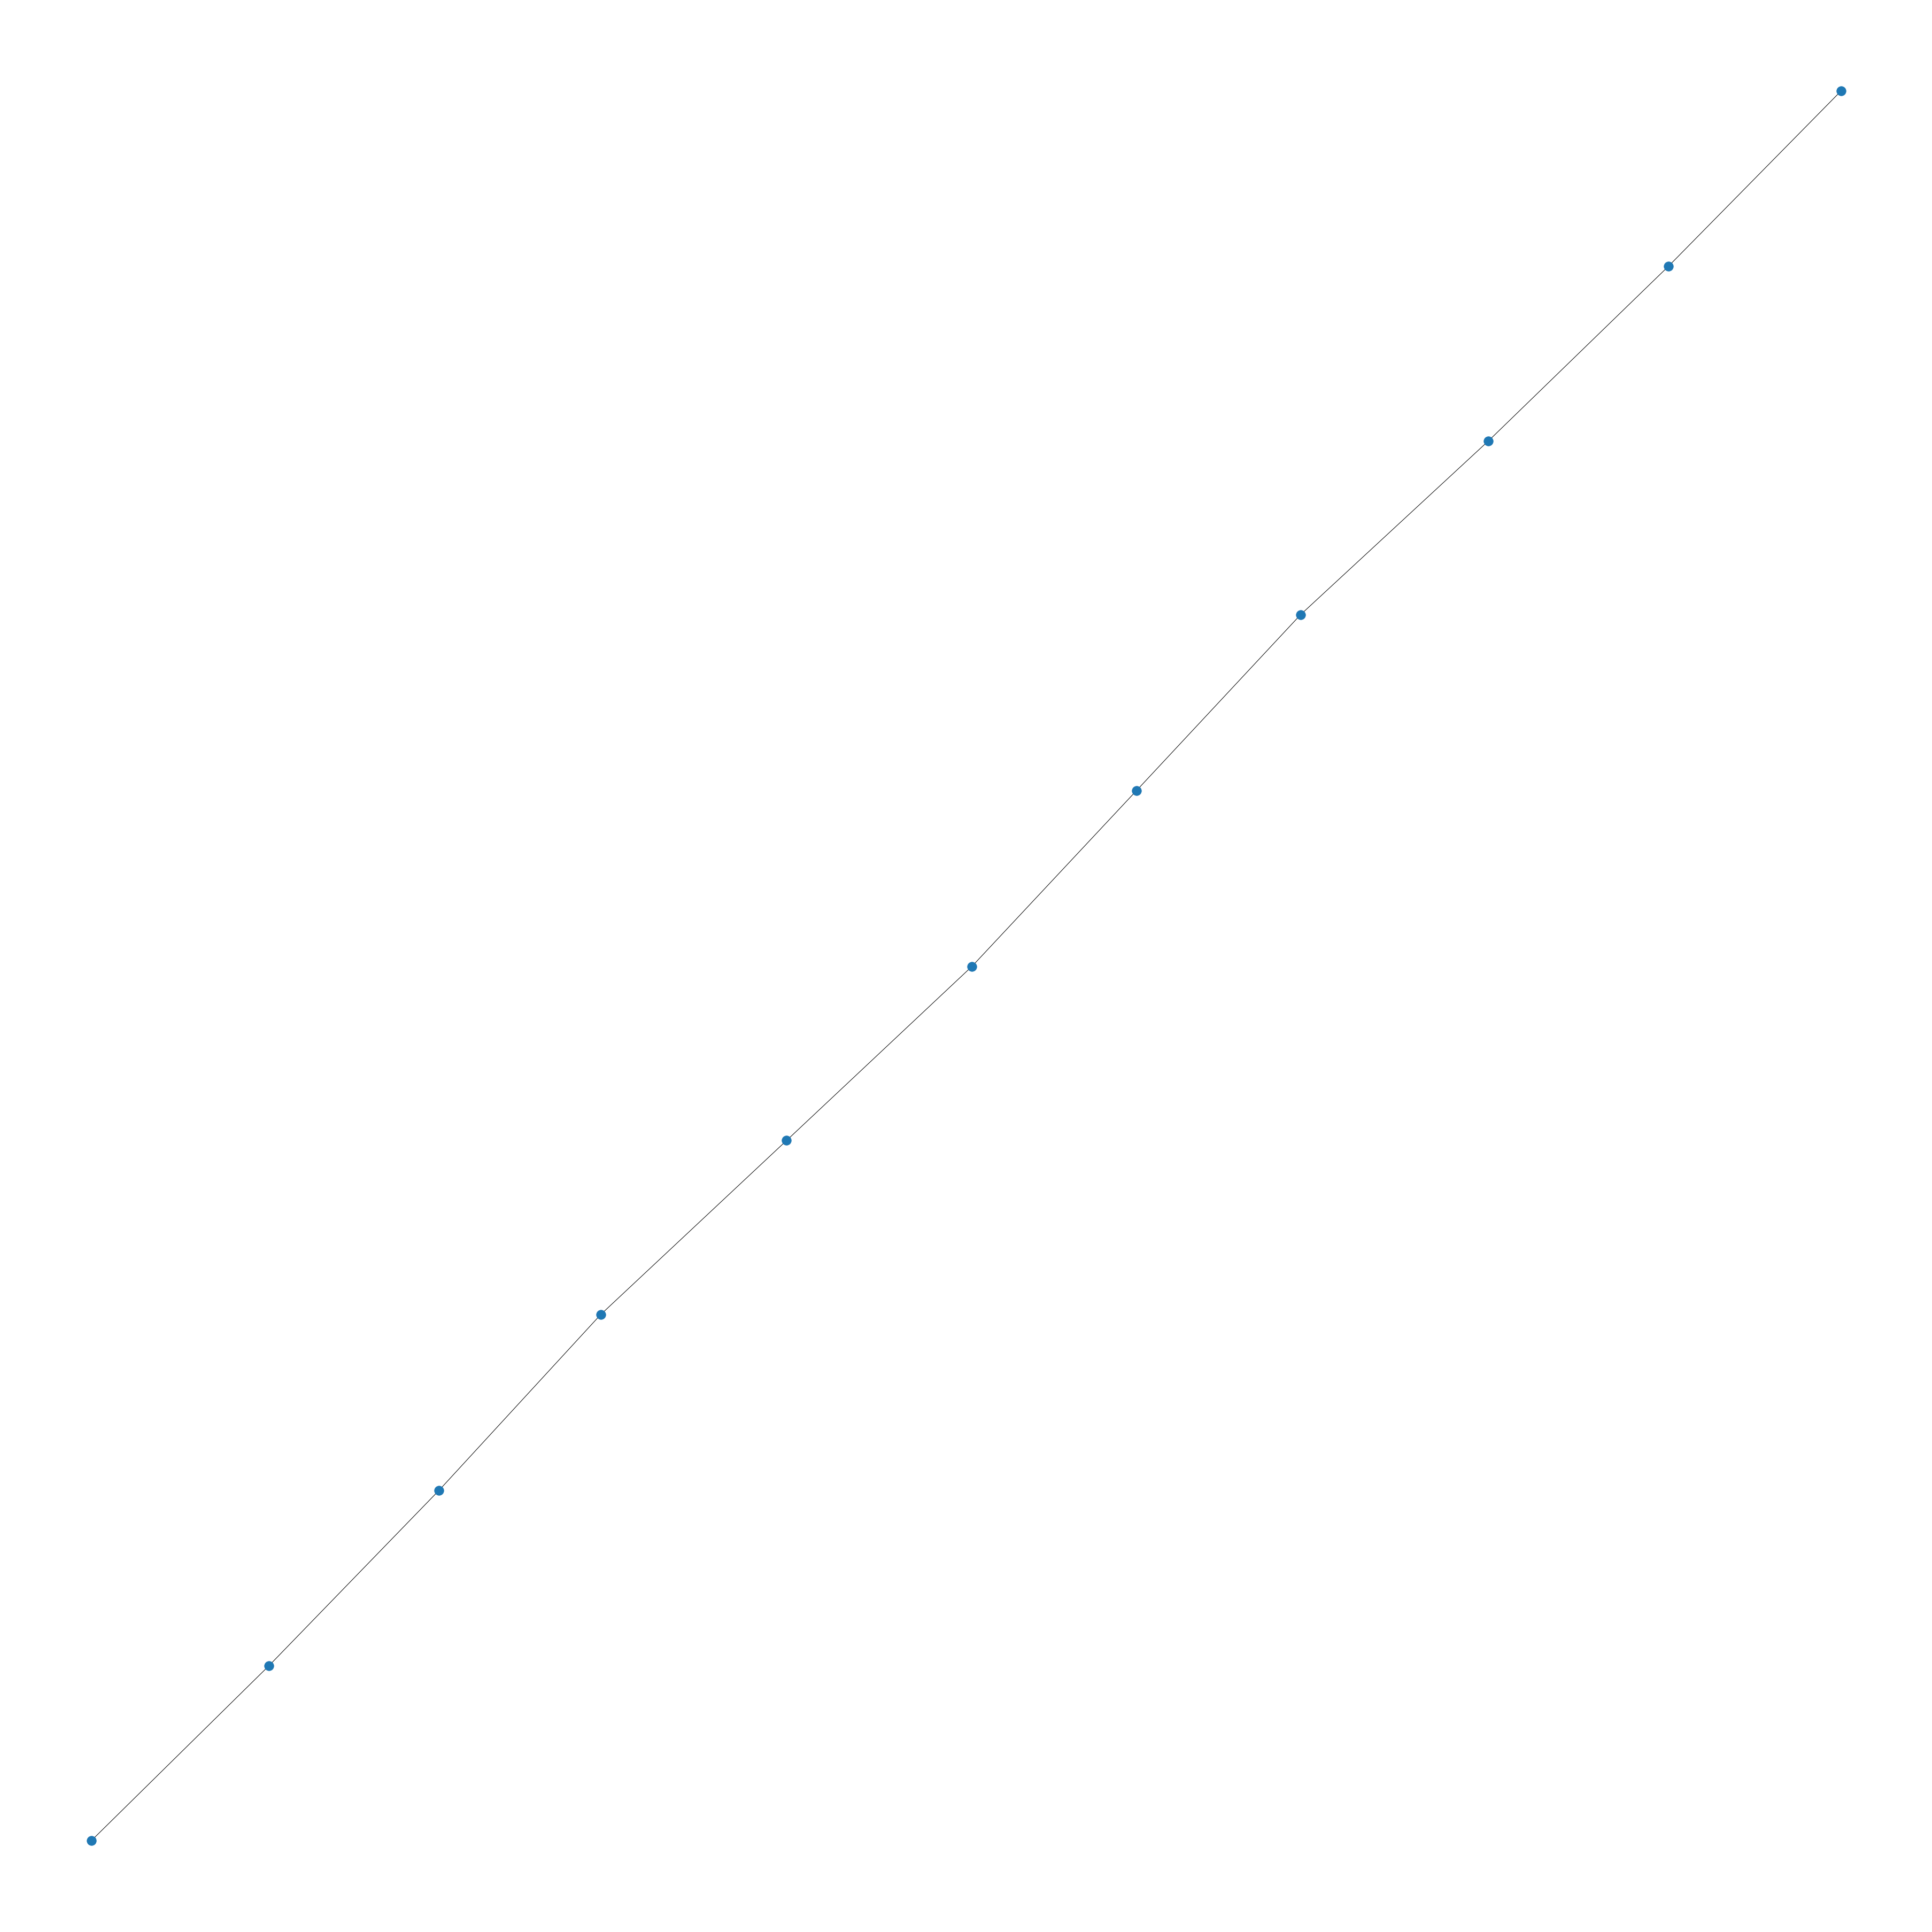

In [16]:
plt.figure(figsize=(50, 50))

nx.draw_kamada_kawai(kazan_metro_graph, with_labels=False)

In [17]:
stations_colors = {
     'red',
     'green',
     'darkblue',
     'blue',
     'saddlebrown',
     'orangered',
     'blueviolet',
     'gold',
     'gray',
     'lawngreen'
}

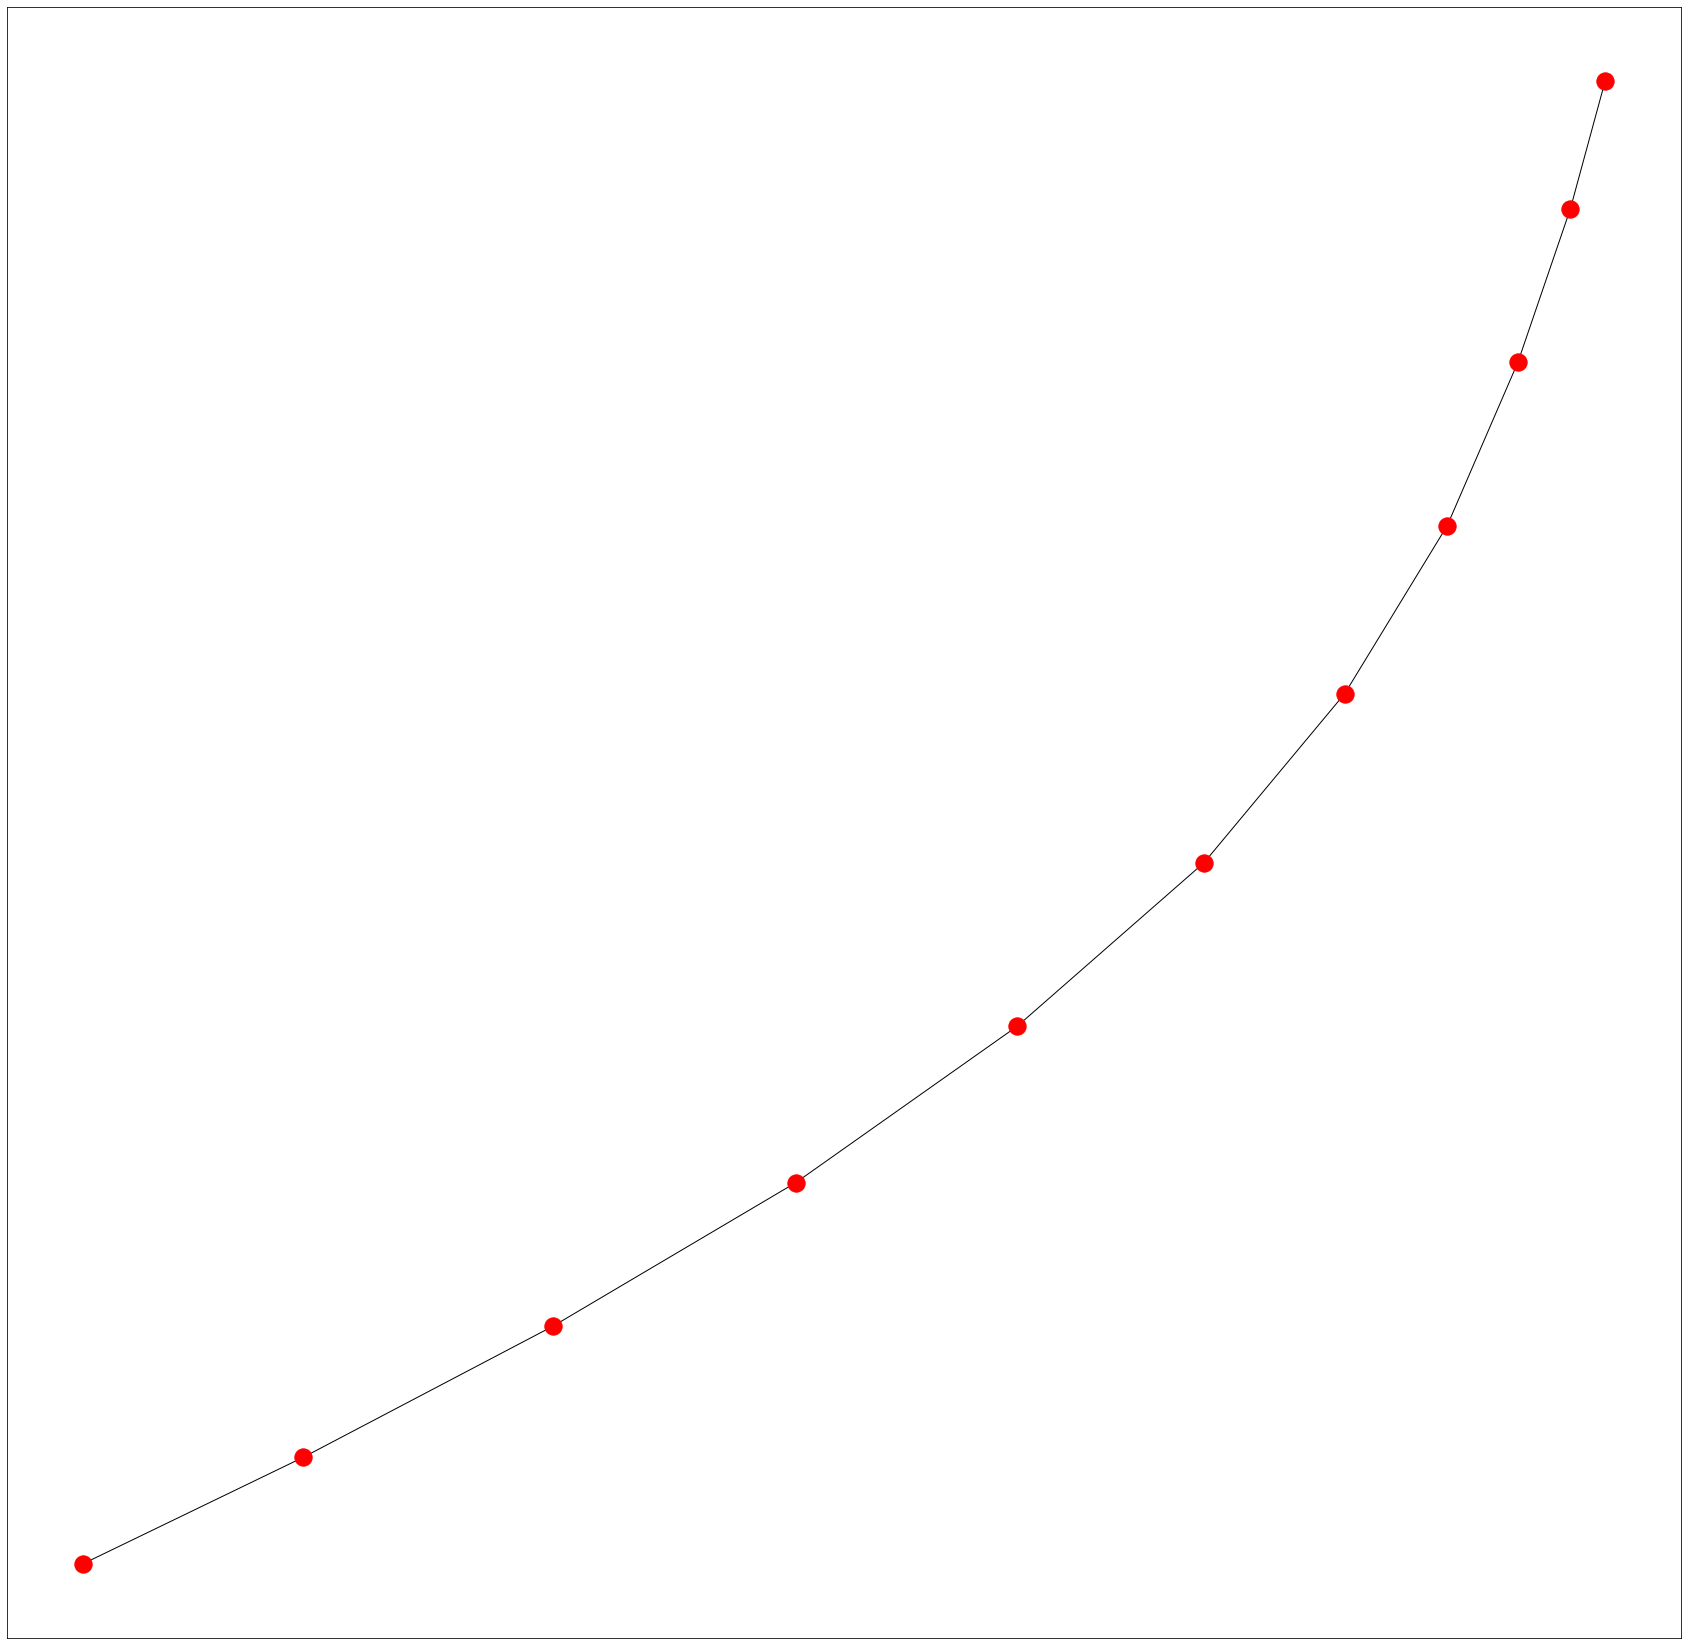

In [18]:
from matplotlib import colors as mcolors

plt.figure(figsize=(30, 30))

nx.draw_networkx(kazan_metro_graph, with_labels=False, node_color=list(stations_colors)[0:11:10])